In [ ]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from static_sim import load_stats
from files_handlers import load_ground_truth
import numpy as np
import pandas as pd

In [40]:
stratified_foder = r'../results/20240508/exp_20240508_102431_p_1000_s_50_rsm_stratified'
multinomial_foder = r'../results/20240508/exp_20240508_102459_p_1000_s_50_rsm_multinomial'
systematic_foder = r'../results/20240508/exp_20240508_102357_p_1000_s_50_rsm_systematic'
stratified_mean, stratified_cov = load_stats(stratified_foder)
multinomial_mean, multinomial_cov = load_stats(multinomial_foder)
systematic_mean, systematic_cov = load_stats(systematic_foder)
x_gt, z_gt = load_ground_truth(stratified_foder)
%matplotlib inline


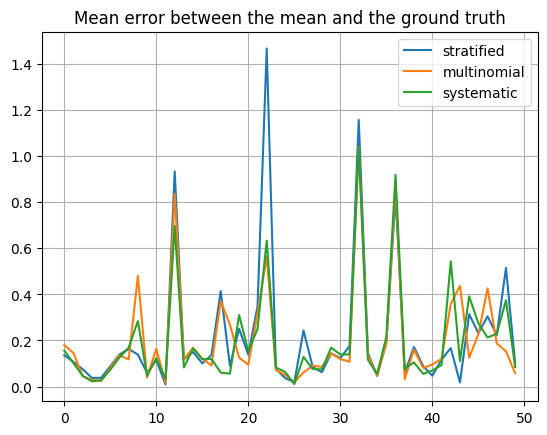

In [44]:
## calculte the mean error between mean and ground truth for every method
stratified_error = np.linalg.norm(stratified_mean - x_gt,axis=1)
multinomial_error= np.linalg.norm(multinomial_mean - x_gt,axis=1)
systematic_error = np.linalg.norm(systematic_mean - x_gt,axis=1)
# plot the errors on the same graph 
plt.plot(stratified_error, label='stratified')
plt.plot(multinomial_error, label='multinomial')
plt.plot(systematic_error, label='systematic')
plt.legend()
plt.title('Mean error between the mean and the ground truth')
plt.grid("on")
plt.show()


In [42]:
def calc_std_from_con(cov: pd.DataFrame):
    cov_np = cov.to_numpy().reshape(-1, 2, 2)
    eigen_values, eigen_vectors = np.linalg.eig(cov_np)
    std_norm = np.sqrt(eigen_values[:,0] + eigen_values[:,1])
    return std_norm
    

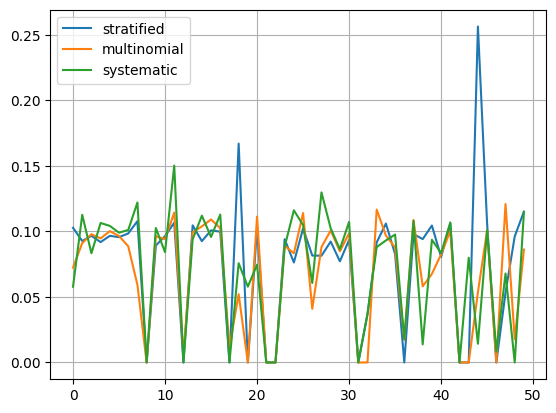

In [45]:
stratified_std = calc_std_from_con(stratified_cov)
multinomial_std = calc_std_from_con(multinomial_cov)
systematic_std = calc_std_from_con(systematic_cov)

#plot all the std on the same graph
plt.plot(stratified_std, label='stratified')
plt.plot(multinomial_std, label='multinomial')
plt.plot(systematic_std, label='systematic')
plt.legend()
plt.grid()